### Импортиуем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [44]:
sent = ['В статье я постарался показать основные этапы при регрессионном анализе данных с помощью Python и аналитческих пакетов pandas и scikit-learn. Необходимо отметить, что набор данных специально выбирался таким образом чтобы быть максимально формализованым и первичная обработка входных данных была бы минимальна. На мой взгляд статья будет полезна тем, кто только начинает свой путь в анализе данных, а также тем кто имеет хорошую теоретическую базу, но выбирает инструментарий для работы.']

In [103]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from pymorphy2 import MorphAnalyzer

In [39]:
qwe = nltk.corpus.stopwords.words("russian")

In [104]:
tf_idf = TfidfVectorizer(stop_words=qwe)
MA = MorphAnalyzer()

In [138]:
patt = "[^а-яА-Я0-9]"
def preprocess(sents):
    sents = re.sub(patt, ' ', sents)
    tokens = []
    for token in sents.split():
        token = MA.normal_forms(token)[0]
        tokens.append(token)
    return ' '.join(tokens)

In [149]:
text = tf_idf.fit_transform(preprocess(s) for s in sent)
id2word = {i:word for i,word in enumerate(tf_idf.get_feature_names())}
dictonary = []
for row_data in text.getrow(text_row):
    words_for_this_text = row_data.toarray().argsort()
    top_words_for_this_text = words_for_this_text [0,-6:]
    dictonary.append([id2word[w] for w in top_words_for_this_text])
print(dictonary) 

[['аналитческий', 'взгляд', 'база', 'анализ', 'статья', 'данные']]


### Загрузим датасет

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", delimiter=',')

### Посмотрим на данные первых 5 полей всех атрибутов 

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.shape

(134880, 67)

### Отберем те атрибуты, которые являются более полезными

In [5]:
df2 = df[["continent","location","date","total_cases","new_cases","total_deaths","new_deaths","reproduction_rate",
        "icu_patients","hosp_patients","total_tests","new_tests","positive_rate","tests_per_case","tests_units",
         "total_vaccinations","people_vaccinated","people_fully_vaccinated","stringency_index","population",
         "median_age","aged_65_older","gdp_per_capita","extreme_poverty","cardiovasc_death_rate",
         "diabetes_prevalence","female_smokers","male_smokers","handwashing_facilities",
         "hospital_beds_per_thousand","life_expectancy","human_development_index"]].copy()

In [6]:
df2.shape

(134880, 32)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134880 entries, 0 to 134879
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   126276 non-null  object 
 1   location                    134880 non-null  object 
 2   date                        134880 non-null  object 
 3   total_cases                 127480 non-null  float64
 4   new_cases                   127478 non-null  float64
 5   total_deaths                116283 non-null  float64
 6   new_deaths                  116479 non-null  float64
 7   reproduction_rate           104981 non-null  float64
 8   icu_patients                16165 non-null   float64
 9   hosp_patients               18942 non-null   float64
 10  total_tests                 56492 non-null   float64
 11  new_tests                   56136 non-null   float64
 12  positive_rate               63905 non-null   float64
 13  tests_per_case

### Посмотрим количество пустых значений каждого атрибута

In [8]:
df2.isna().sum()

continent                       8604
location                           0
date                               0
total_cases                     7400
new_cases                       7402
total_deaths                   18597
new_deaths                     18401
reproduction_rate              29899
icu_patients                  118715
hosp_patients                 115938
total_tests                    78388
new_tests                      78744
positive_rate                  70975
tests_per_case                 71636
tests_units                    64413
total_vaccinations            100394
people_vaccinated             102000
people_fully_vaccinated       104970
stringency_index               25097
population                       964
median_age                     18565
aged_65_older                  19851
gdp_per_capita                 17812
extreme_poverty                56609
cardiovasc_death_rate          18341
diabetes_prevalence            14495
female_smokers                 44091
m

### Начнем потихоньку избавляться от пустых значений, начнем с "continent"

In [11]:
df2[df2["continent"].isnull()]["location"].value_counts()

Asia                   670
Upper middle income    670
World                  670
High income            670
Lower middle income    670
North America          670
Europe                 669
European Union         669
Oceania                667
International          654
Africa                 648
South America          639
Low income             638
Name: location, dtype: int64

### Атрибут "continent" пуст так как в этих строках собраны значения по миру и континентам, эти данные нам пригодятся поэтому просто вместо пустого значения напишем "other"

In [17]:
df2["continent"] = df2["continent"].fillna("other")

### Посмотрим на уникальные значения "tests_units"

In [18]:
df2["tests_units"].value_counts()

tests performed    36790
people tested      11030
samples tested     10088
units unclear       1096
Name: tests_units, dtype: int64

### Как видим у нас есть значение "units unclear", поэтому заменим пустые значения на него

In [19]:
df2["tests_units"] =df2["tests_units"].fillna("units unclear")

### посмотрим на "population"

In [20]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
df2[df2["population"].isnull()]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
46622,other,International,2020-02-07,61.0,61.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46623,other,International,2020-02-08,61.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46624,other,International,2020-02-09,64.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46625,other,International,2020-02-10,135.0,71.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46626,other,International,2020-02-11,135.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74159,Asia,Northern Cyprus,2021-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74160,Asia,Northern Cyprus,2021-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74161,Asia,Northern Cyprus,2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74162,Asia,Northern Cyprus,2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### удалим, так как нам не нужен International 

In [21]:
df2 = df2.dropna(axis='index', how='any', subset=['population'])
df2 = df2.reset_index(drop=True)

### теперь посмотрим на пустые значения "stringency_index"

In [22]:
df2[df2["stringency_index"].isnull()]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
532,Asia,Afghanistan,2021-08-09,150778.0,968.0,6936.0,57.0,0.77,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
533,Asia,Afghanistan,2021-08-10,151013.0,235.0,6961.0,25.0,0.76,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
534,Asia,Afghanistan,2021-08-11,151291.0,278.0,6978.0,17.0,0.76,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
535,Asia,Afghanistan,2021-08-12,151563.0,272.0,6988.0,10.0,0.76,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
536,Asia,Afghanistan,2021-08-13,151770.0,207.0,7000.0,12.0,0.76,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108452,Asia,Yemen,2021-08-16,7308.0,15.0,1405.0,2.0,NaN,NaN,NaN,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470
108453,Asia,Yemen,2021-08-17,7347.0,39.0,1407.0,2.0,NaN,NaN,NaN,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.470
108971,Africa,Zambia,2021-08-17,202787.0,358.0,3550.0,12.0,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
109486,Africa,Zimbabwe,2021-08-16,120088.0,0.0,4109.0,0.0,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


### при анализе данных видим то что данных нету в 3 случаях: 
### 1) значение continent = other
### 2) Дни когда в определенной стране еще не было коронавируса
### 3) Новые данные, скорее всего не успели занести 

### Составим алгорит который в случае 2 будет ставить нули, так как мер никаких пока нет, а в случае 3 будем ставить значения предыдущих дней, считая что за это время особо ничего не изменилось 

In [23]:
df2["stringency_index"].isna().sum()

17707

In [24]:
%%time
for i in range(len(df2)-1):
    if (pd.isna(df2["stringency_index"][i+1])):
        if (df2["continent"][i+1] == "other"):
            continue
        else:
            x = df2["location"][i]
            if(df2["stringency_index"][i+1] == x):
                df2["stringency_index"][i+1] = df2["stringency_index"][i]
            else:
                df2["stringency_index"][i+1] = 0
        

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 6.4 s


In [25]:
df2["stringency_index"].isna().sum()

4534

In [26]:
df2[df2["continent"] == "other"].shape[0]

4534

### теперь займемся 1 случаем, будем считать среднее значение по континенту в определенный день и вписывать его вместо пусого значения

In [27]:
df2["continent"].value_counts()

Africa           28167
Europe           26005
Asia             25692
North America    13876
South America     6548
Oceania           4666
other             4534
Name: continent, dtype: int64

In [28]:
%%time
index = df2[df2["continent"] == "other"].index
for i in range(len(index)):
    x = df2["date"][index[i]]
    i_con = df2[df2["continent"] == df2["location"][index[i]]].index
    a = 0
    c_a = 0
    for j in range(len(i_con)):
        if(df2["date"][i_con[j]] == x):
            a += df2["stringency_index"][i_con[j]]
            c_a += 1
    if (c_a == 0):
        df2["stringency_index"][index[i]] = 0
    else:
        df2["stringency_index"][index[i]] = a/c_a

<timed exec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 27min 52s


In [29]:
df2["stringency_index"].isna().sum()

0

### большенсво остальных данных пустые из-за причин 3 и 2 которые я описал выше, поэтому просто переделаем алгоритм который использовали раньше

In [30]:
%%time
for j in range(df2.shape[1]):
    for i in range(df2.shape[0]-1):
        if (pd.isna(df2.iloc[i+1,j])):
            x = df2["location"][i]
            if(df2.iloc[i+1,j] == x):
                df2.iloc[i+1,j] = df2.iloc[i,j]
            else:
                df2.iloc[i+1,j] = 0

KeyboardInterrupt: 

In [31]:
df2.isna().sum()

continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
                              ...  
male_smokers                  33837
handwashing_facilities        60125
hospital_beds_per_thousand    20081
life_expectancy                4884
human_development_index       11119
Length: 32, dtype: int64

### Добавим атрибут RT, который обозначает коэффициент распространения RT

In [32]:
df2['RT']= 0

In [ ]:
%%time
for i in range(len(df2)-8):
    loc = df2['location'][i]
    if(df2['location'][i+8] == loc):
        df2['RT'][i+8] = (df2['total_cases'][i+7]+df2['total_cases'][i+6]+df2['total_cases'][i+5]+df2['total_cases'][i+4])/(df2['total_cases'][i+3]+df2['total_cases'][i+2]+df2['total_cases'][i+1]+df2['total_cases'][i])
    else:
        for j in range(8):
            df2['RT'][i] = 0
            i += 1

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: RuntimeWarning: invalid value encountered in double_scalars
C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<timed exec>:4: RuntimeWarning: divide by zero encountered in double_scalars


### Займемся заменой данных object на подходящий нам для машинного обучения 

In [ ]:
df2.info()

### атрибуты continent, location, tests_units можно просто закодировать с помощью LabelEncoder()

In [ ]:
le1 = LabelEncoder()
df2["continent"] = le1.fit_transform(df2["continent"].astype('str'))

In [ ]:
le1.classes_

In [ ]:
le2 = LabelEncoder()
df2["location"] = le2.fit_transform(df2["location"].astype('str'))

In [ ]:
le3 = LabelEncoder()
df2["tests_units"] = le3.fit_transform(df2["tests_units"].astype('str'))

### перезапишем данные атрибута date изменив тип на datetime, чтобы позже с ним было проще работать

In [ ]:
df2['Date'] = pd.to_datetime(df2['date'],format='%Y-%m-%d')

In [ ]:
df2 = df2.drop(['date'], axis = 1)

### удалим данные по короновирусы за послений месяц так как там было много пустых данных, которые будут просто путать нашу модель

In [ ]:
df2.shape

In [ ]:
df2 = df2.drop(df2[df2['Date'].dt.year == 2021][df2['Date'].dt.month == 6].index)
df2 = df2.reset_index(drop=True)

In [ ]:
df2.shape

In [ ]:
pd.set_option('display.max_columns', None)
df2.head()

### Данные сохраню для себя

In [ ]:
df2.to_csv('C:\\Users\\Данил\\Desktop\\WS\\koronaV.csv', index=False)

In [3]:
df2 = pd.read_csv('C:\\Users\\Данил\\Desktop\\WS\\koronaV.csv', sep=',', )

In [4]:
df2['Date'] = pd.to_datetime(df2['Date'],format='%Y-%m-%d')

### Теперь кластеризируем наши данные на 3 группы

### Время и локация в кластеризации нам не важны

In [5]:
df3 = df2.drop(['Date','continent','location','tests_units'], axis = 1)
df3.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,RT
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0


### Поскольку объекты в нашем наборе данных не имеют одинакового масштаба, нам необходимо стандартизировать весь набор данных.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df3)
X_scale = scaler.transform(df3)
df_scale = pd.DataFrame(X_scale, columns=df3.columns)
df_scale.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,RT
0,-0.145293,-0.159101,-0.158765,-0.173043,-1.717336,-0.113634,-0.134452,-0.151997,-0.183849,-0.553873,...,-0.492297,2.686827,0.52231,-0.759927,-1.254278,0.418318,-0.818954,-0.307123,-0.707522,-1.846912
1,-0.145293,-0.159128,-0.158765,-0.173043,-1.717336,-0.113634,-0.134452,-0.151997,-0.183849,-0.553873,...,-0.492297,2.686827,0.52231,-0.759927,-1.254278,0.418318,-0.818954,-0.307123,-0.707522,-1.846912
2,-0.145293,-0.159128,-0.158765,-0.173043,-1.717336,-0.113634,-0.134452,-0.151997,-0.183849,-0.553873,...,-0.492297,2.686827,0.52231,-0.759927,-1.254278,0.418318,-0.818954,-0.307123,-0.707522,-1.846912
3,-0.145293,-0.159128,-0.158765,-0.173043,-1.717336,-0.113634,-0.134452,-0.151997,-0.183849,-0.553873,...,-0.492297,2.686827,0.52231,-0.759927,-1.254278,0.418318,-0.818954,-0.307123,-0.707522,-1.846912
4,-0.145293,-0.159128,-0.158765,-0.173043,-1.717336,-0.113634,-0.134452,-0.151997,-0.183849,-0.553873,...,-0.492297,2.686827,0.52231,-0.759927,-1.254278,0.418318,-0.818954,-0.307123,-0.707522,-1.846912


### Некоторые алгоритмы, такие как KMeans, затрудняют точное построение кластеров, если набор данных имеет слишком много функций, поэтому применим анализ главных компонентов

In [8]:
from sklearn.decomposition import PCA

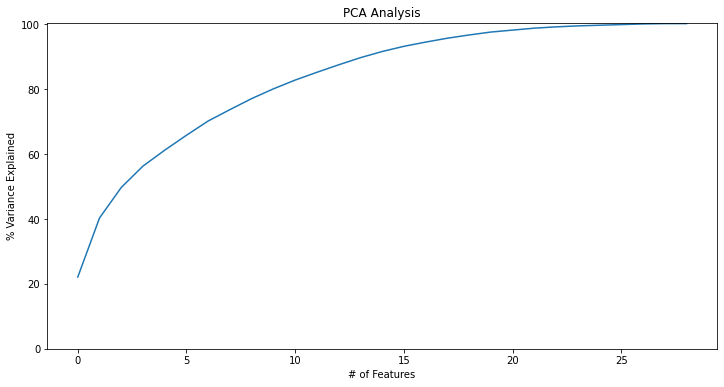

In [9]:
pca = PCA(n_components=df3.shape[1])
pca.fit(df_scale)
variance = pca.explained_variance_ratio_ 

var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### При 10 признаках дисперсия составляет 80%, поэтому будем использовать 10-компонентный PCA

In [10]:
pca = PCA(n_components=10)
pca.fit(df_scale)
pca_scale = pca.transform(df_scale)
pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3','pc4', 'pc5', 'pc6','pc7', 'pc8', 'pc9', 'pc10'])
print(pca.explained_variance_ratio_) # Процент дисперсии, объясняемой каждым из выбранных компонентов

[0.22125836 0.18175502 0.09356872 0.06564237 0.04850398 0.04603701
 0.04412032 0.03466169 0.03413634 0.03039806]


### Попробуем метод KMeans

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

In [13]:
model.fit(pca_df)
y_pred = model.predict(pca_df)
pd.DataFrame(y_pred)[0].value_counts()

2    55070
0    33452
1      740
Name: 0, dtype: int64

In [14]:
df2["knn_lable"] = y_pred

In [25]:
#le2.transform(['World']) #196

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

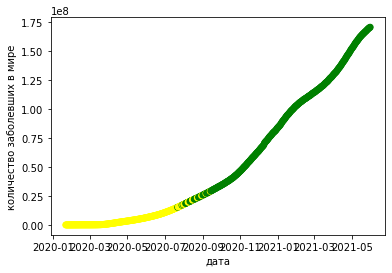

In [15]:
plt.scatter(x=df2[df2["location"]==196].iloc[:, 31], y=df2[df2["location"]==196].iloc[:, 2], c=df2[df2["location"]==196].iloc[:, 33].map({0: 'red', 1: 'green', 2:'yellow'}))
plt.xlabel('дата')
plt.ylabel('количество заболевших в мире')
plt.show()

### Попробуем метод DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

### Прежде чем применить алгоритм кластеризации, мы должны определить соответствующий уровень эпсилона, используя “Метод локтя”

In [17]:
from sklearn.neighbors import NearestNeighbors

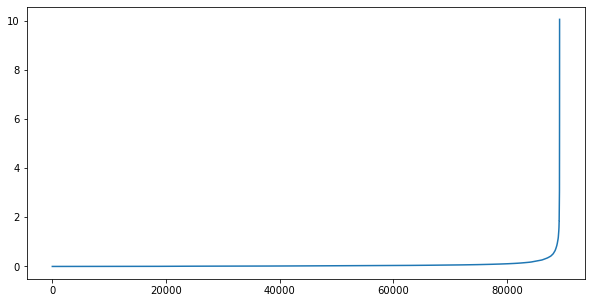

In [18]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=10).fit(pca_df)
distances, idx = nn.kneighbors(pca_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

### Оптимальное значение эпсилона составляет около 0,5. Наконец, поскольку у нас есть 10 основных компонента наших данных, мы установим наши минимальные критерии баллов равными 20.

In [16]:
#y_pred = DBSCAN(eps = 0.5, min_samples = 20).fit_predict(pca_df)

In [17]:
#import sklearn.metrics as metrics

In [19]:
%%time
db = DBSCAN(eps=0.5, min_samples=20).fit(pca_df)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Предполагаемое число кластеров: %d' % n_clusters_)
print('Расчетное количество точек шума: %d' % n_noise_)
#print("Коэффициент силуэта: %0.3f" % metrics.silhouette_score(pca_df, labels))

Предполагаемое число кластеров: 214
Расчетное количество точек шума: 10491
Wall time: 27.7 s


### У нас получилось слишком много класстеров попробуем увеличить значения eps и min_samples

In [ ]:
%%time
db = DBSCAN(eps=1.0, min_samples=20).fit(pca_df)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Предполагаемое число кластеров: %d' % n_clusters_)
print('Расчетное количество точек шума: %d' % n_noise_)

In [32]:
%%time
db = DBSCAN(eps=2, min_samples=10).fit(pca_df)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Предполагаемое число кластеров: %d' % n_clusters_)
print('Расчетное количество точек шума: %d' % n_noise_)
# 3мин 7 кластеров

Предполагаемое число кластеров: 7
Расчетное количество точек шума: 331
Wall time: 5min 3s


In [ ]:
y_pred = DBSCAN(eps = 2, min_samples = 50).fit_predict(pca_df)
pd.DataFrame(y_pred)[0].value_counts()

In [ ]:
df2["dbscan_lable"] = y_pred

In [ ]:
plt.scatter(x=df2[df2["location"]==196].iloc[:, 31], y=df2[df2["location"]==196].iloc[:, 2], c=df2[df2["location"]==196].iloc[:, 34])
plt.xlabel('дата')
plt.ylabel('количество заболевших в мире')
plt.show()

### из-за невозможности указать количество кластеров в DBSCAN получить желаемый результат сложно, попробуем Birch

In [ ]:
from sklearn.cluster import Birch

In [ ]:
brc = Birch(n_clusters=3)

In [ ]:
%%time
brc.fit(pca_df)
y_pred = brc.predict(pca_df)
pd.DataFrame(y_pred)[0].value_counts()

In [ ]:
df2["birch_lable"] = y_pred

In [ ]:
plt.scatter(x=df2[df2["location"]==196].iloc[:, 31], y=df2[df2["location"]==196].iloc[:, 2], c=df2[df2["location"]==196].iloc[:, 35])
plt.xlabel('дата')
plt.ylabel('количество заболевших в мире')
plt.show()

### Лучше всего нам подходят метки knn_lable. Оставим их, удалив остальные

In [15]:
df2=df2.drop(["dbscan_lable","birch_lable"], axis=1)

KeyError: "['dbscan_lable' 'birch_lable'] not found in axis"

### Посмотрим зависимость целевой функции от других атрибутов 

In [16]:
df2.corr()

,continent,location,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,RT,knn_lable
continent,1.000000,-0.053009,0.274762,0.298806,0.309042,0.336027,-0.164706,0.047747,0.046230,0.026410,...,-0.362653,0.037304,0.169883,-0.171001,-0.024959,0.045650,-0.251070,-0.045158,0.010275,-0.065772
location,-0.053009,1.000000,0.070332,0.068453,0.083460,0.084919,0.000903,0.069400,0.071270,0.091085,...,0.028288,0.019545,-0.027081,0.040460,-0.006775,-0.004400,0.063594,-0.045119,-0.002839,0.035631
total_cases,0.274762,0.070332,1.000000,0.873657,0.984820,0.850887,-0.064598,0.141268,0.127582,0.205960,...,-0.111549,-0.067003,-0.016519,-0.030493,0.001453,-0.043910,-0.201923,-0.116214,-0.029061,0.196120
new_cases,0.298806,0.068453,0.873657,1.000000,0.874446,0.927878,-0.060502,0.162044,0.153619,0.170168,...,-0.120989,-0.074064,-0.020900,-0.034135,0.004379,-0.049406,-0.223176,-0.130188,-0.017392,0.195078
total_deaths,0.309042,0.083460,0.984820,0.874446,1.000000,0.877881,-0.069937,0.119721,0.110170,0.154545,...,-0.128879,-0.077800,-0.019268,-0.038739,0.002335,-0.050035,-0.221984,-0.128108,-0.029336,0.195268
new_deaths,0.336027,0.084919,0.850887,0.927878,0.877881,1.000000,-0.070824,0.125099,0.121737,0.115475,...,-0.135958,-0.084463,-0.022944,-0.040518,0.004614,-0.052795,-0.242875,-0.141599,-0.015366,0.184141
reproduction_rate,-0.164706,0.000903,-0.064598,-0.060502,-0.069937,-0.070824,1.000000,0.033917,0.041083,0.045545,...,0.101627,0.027272,0.208229,0.199933,0.075139,0.150431,0.324509,0.309682,0.103286,-0.214167
icu_patients,0.047747,0.069400,0.141268,0.162044,0.119721,0.125099,0.033917,1.000000,0.915416,0.579349,...,-0.080745,0.022375,0.167822,0.030643,-0.080940,0.069670,0.072277,0.116175,-0.009158,0.003258
hosp_patients,0.046230,0.071270,0.127582,0.153619,0.110170,0.121737,0.041083,0.915416,1.000000,0.532345,...,-0.090668,-0.006307,0.200883,0.042500,-0.095769,0.081968,0.086406,0.131385,-0.009220,-0.037707
total_tests,0.026410,0.091085,0.205960,0.170168,0.154545,0.115475,0.045545,0.579349,0.532345,1.000000,...,-0.026939,0.056355,0.102128,0.049303,-0.036666,0.033258,0.061434,0.102888,-0.030414,0.041033


In [17]:
df2.corr()>0.8

,continent,location,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,RT,knn_lable
continent,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
location,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_cases,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new_cases,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_deaths,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new_deaths,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
reproduction_rate,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
icu_patients,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
hosp_patients,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
total_tests,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Классификация

### Теперь посмотрим сколько у нас имеется дней

In [16]:
df2['Date'].min(), df2['Date'].max(), (df2['Date'].max() - df2['Date'].min())

(Timestamp('2020-01-22 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timedelta('495 days 00:00:00'))

### оставим 3 месяца на валидацию и используем оставшиеся на обучение:

In [17]:
df2.shape

(89262, 34)

In [18]:
train=df2[df2['Date']<=pd.to_datetime('2021-02-28')]
test=df2[df2['Date']>=pd.to_datetime('2021-03-01')]

train.shape, test.shape

((70941, 34), (18321, 34))

In [19]:
train = train.drop(['Date','continent','location'], axis = 1)
test = test.drop(['Date','continent','location'], axis = 1)

In [20]:
X_train = train.drop(['knn_lable'],axis=1)
X_test = test.drop(['knn_lable'],axis=1)
y_train = train['knn_lable']
y_test = test['knn_lable']


### Начнем с простого и быстрого KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
%%time
first_knn = KNeighborsClassifier()
knn_params = {'n_neighbors':range(1,10,1)}
knn_grid = GridSearchCV(first_knn,knn_params,cv=5)
knn_grid.fit(X_train,y_train)
print(knn_grid.best_score_)
print(knn_grid.best_params_) 
knn_grid.score(X_test, y_test)

0.6533745729522047
{'n_neighbors': 6}
Wall time: 2min 14s


0.9193821297964085

### Точность 0.965% очень хорошая для такого простого метода, посмотрим что покажут более сложные модели

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
%%time
gbrt = GradientBoostingClassifier(max_depth=5)
gbrt.fit(X_train,y_train)
gbrt.score(X_test, y_test)

In [ ]:
%%time
gbrt = GradientBoostingClassifier(max_depth=7)
gbrt.fit(X_train,y_train)
gbrt.score(X_test, y_test)

In [ ]:
%%time
gbrt = GradientBoostingClassifier(max_depth=2)
gbrt.fit(X_train,y_train)
gbrt.score(X_test, y_test)

### Мы получили точность 0.977% что является идеальным, попробуем еще один метод 

In [56]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(gamma=1, C=1)
svm.fit(X_train,y_train)
svm.score(X_test, y_test)

### Из-за последнего метода завис ноутбук) 

### Больше всего точность получилась у GradientBoostingClassifier в дальнейшем будем использовать ее

### Регрессия

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [28]:
'''
def line_fit(location, df):
    x = 196 #le2.transform([location])
    df = df[df["location"]==x]
    scaler_reg = StandardScaler()
    scaler_reg.fit(df.drop(["Date","knn_lable","continent","location","tests_units"], axis=1))
    scaled_df = scaler.transform(df)
    linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
    for col in scaled_df.columns:
        linear_regression_model.fit(scaled_df.drop([col],axis=1), scaled_df[col])
        predictions = linear_regression_model.predict(scaled_df)
'''

In [30]:
#line_fit("Word",df2)

In [21]:
df2.head()

,continent,location,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Date,RT,knn_lable
0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,2020-02-24,0.0,2
1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,2020-02-25,0.0,2
2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,2020-02-26,0.0,2
3,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,2020-02-27,0.0,2
4,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,2020-02-28,0.0,2


In [22]:
train=df2[df2['Date']<=pd.to_datetime('2021-02-28')]
test=df2[df2['Date']>=pd.to_datetime('2021-03-01')]

train.shape, test.shape

((70941, 34), (18321, 34))

In [23]:
y_train = train.drop(['continent','location', 'knn_lable', 'tests_units', 'Date'], axis=1)
X_train = train.drop(['knn_lable', 'Date'], axis=1)

y_test = test.drop(['continent','location', 'knn_lable', 'tests_units', 'Date'], axis=1)
X_test = test.drop(['knn_lable', 'Date'], axis=1)

In [27]:
models = [LinearRegression(), # метод наименьших квадратов
          #RandomForestRegressor(n_estimators=20, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          #SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          #LogisticRegression() # логистическая регрессия
          ]

In [28]:
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    print(m)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in  range(y_train.shape[1]):
        #обучаем модель
        model.fit(X_train, y_train.iloc[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(y_test.iloc[:,0], model.predict(X_test))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

LinearRegression()
KNeighborsRegressor(n_neighbors=6)


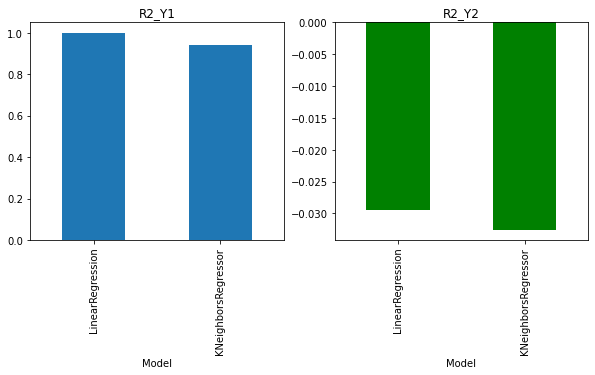

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')

In [30]:
model = models[0]
model.fit(X_train, y_train)

LinearRegression()

In [33]:
model.predict(X_test)

array([[5.57330000e+04, 1.90000000e+01, 2.44400000e+03, ...,
        6.48300000e+01, 5.11000000e-01, 1.00119534e+00],
       [5.57590000e+04, 2.60000000e+01, 2.44600000e+03, ...,
        6.48300000e+01, 5.11000000e-01, 1.00109161e+00],
       [5.57700000e+04, 1.10000000e+01, 2.44600000e+03, ...,
        6.48300000e+01, 5.11000000e-01, 1.00101937e+00],
       ...,
       [3.89330000e+04, 1.50000000e+01, 1.59400000e+03, ...,
        6.14900000e+01, 5.71000000e-01, 1.00372283e+00],
       [3.89440000e+04, 1.10000000e+01, 1.59400000e+03, ...,
        6.14900000e+01, 5.71000000e-01, 1.00491720e+00],
       [3.89610000e+04, 1.70000000e+01, 1.59400000e+03, ...,
        6.14900000e+01, 5.71000000e-01, 1.00481592e+00]])